In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.1.0'

**张量（Tensor）**：多维数组（列表）
**阶**：张量的维数

维数 | 阶 | 名字 | 例子
-----|----|------|-----
0-D  |0  | 标量 scalar | s=1 2 3 
1-D  |1  | 向量 vector | v=[1, 2, 3]
2-D  |2  | 矩阵 matrix | m=[[1, 2, 3], [4, 5, 6]]
n-D  |n  | 张量 tensor | t=[[[ ... (n 个)

张量可以表示 0 阶到 n 阶数组（列表）

## 1.1 数据类型

 + 整型：`tf.int8`、`tf.int16`、`tf.int32`、`tf.int64`
  - 表示形式：`tf.constant(123, dtype=tf.int32)`
 + 浮点型：`tf.float16`、`tf.float32`、`tf.float64`
  - 表示形式：`tf.constant(3.14, dtype=tf.float32)`
 + 布尔型: `tf.bool`
  - 表示形式：`tf.constant([True, False])`
 + 字符串型：`tf.string`
  - 表示形式：`tf.constant("Hello, World!")`

## 1.2 如何创建一个 Tensor？

`tf.constant(张量内容, dtype=数据类型(可选))`

In [3]:
a = tf.constant([1, 5], dtype=tf.int32)
a # 输出张量的所有信息

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 5])>

In [4]:
a.shape # 张量的形状

TensorShape([2])

In [5]:
a.dtype # 张量的数据类型

tf.int32

### 1.2.1 将 numpy 的数据类型转换为 Tensor 数据类型

`tf.convert_to_tensor(数据名, dtype=数据类型(可选))`

In [6]:
import numpy as np

In [7]:
a = np.arange(0, 5)
a

array([0, 1, 2, 3, 4])

In [8]:
b = tf.convert_to_tensor(a, dtype=tf.int64)
b

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 1, 2, 3, 4], dtype=int64)>

### 1.2.2 创建全为 0 的张量

`tf.zeros(维度)`

In [9]:
tf.zeros([3, 2])

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

### 1.2.3 创建全为 1 的张量

`tf.ones(维度)`

In [10]:
tf.ones(4)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>

### 1.2.4 创建全为指定值的张量

`tf.fill(维度, 指定值)`

In [11]:
tf.fill([2, 3, 4], 9)

<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
array([[[9, 9, 9, 9],
        [9, 9, 9, 9],
        [9, 9, 9, 9]],

       [[9, 9, 9, 9],
        [9, 9, 9, 9],
        [9, 9, 9, 9]]])>

### 1.2.5 生成正态分布的随机数，默认均值为 0 ，标准差为 1

`tf.random.normal(维度, mean=均值, stddev=标准差)`

In [12]:
tf.random.normal([2, 2], mean=0.5, stddev=1)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.13507414, -0.5230353 ],
       [ 0.3655929 ,  1.2035973 ]], dtype=float32)>


### 1.2.6 生成截断式正态分布的随机数

`tf.random.truncated_normal(维度, mean=均值, stddev=标准差)`

在 `tf.random.truncated_normal` 中如果随机生成数据的取值在 $$(\mu - 2\sigma, \mu + 2\sigma)$$ 之外则重新生成，保证了生成值在均值附近（μ：均值，σ：标准差）。

标准差公式 $$\sigma = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar{x})}{n}}$$

In [13]:
tf.random.truncated_normal([2, 2], mean=0.5, stddev=1)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.591596  ,  0.32270247],
       [-0.1572823 , -0.22211593]], dtype=float32)>

### 1.2.7 生成均匀分布随机数 [ minval, maxval )

`tf.random.uniform(维度, minval=最小值, maxval=最大值)`

In [14]:
tf.random.uniform([2, 2], minval=0, maxval=1)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.5940567 , 0.18465567],
       [0.22921634, 0.17595565]], dtype=float32)>

## 1.3 常用函数

**理解 axis**

在一个二维张量或数组中，可以通过调整 axis 等有 0 或 1 控制执行维度
 + `axis=0` 代表跨行（经度，down）
 + `axis=1` 代表跨列（维度，across）
 
如果不指定 axis ，则所有元素参与计算。

&nbsp; | col0 | col1 | col2 | ...
-------|------|------|------|----
 **row0** |  ╬|════|═══▶| axis=1
 **row1** |  ║| &nbsp;| &nbsp;| &nbsp;
 **row2** |  ▼|&nbsp;| &nbsp;| &nbsp;
 **...**  |  axis=0 |&nbsp;| &nbsp;| &nbsp;

In [15]:
x = tf.constant([[1, 2, 3], [2, 3, 4]], dtype=tf.float32)
x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [2., 3., 4.]], dtype=float32)>

### 1.3.1 强制 tensor 转换为该数据类型

`tf.cast(张量名,dtype=数据类型)`

In [16]:
tf.cast(x, tf.int32)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [2, 3, 4]])>

### 1.3.2 计算张量维度上元素的最小值

`tf.reduce_min(张量名)`

In [17]:
tf.reduce_min(x)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [18]:
tf.reduce_min(x, axis=0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [19]:
tf.reduce_min(x, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

### 1.3.3 计算张量维度上元素的最大值

`tf.reduce_max(张量名)`

In [20]:
tf.reduce_max(x)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [21]:
tf.reduce_max(x, axis=0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

In [22]:
tf.reduce_max(x, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([3., 4.], dtype=float32)>

### 1.3.4 计算张量沿着指定维度的平均值

`tf.reduce_mean(张量名, axis=操作轴)`

In [23]:
tf.reduce_mean(x)

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [24]:
tf.reduce_mean(x, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [25]:
tf.reduce_mean(x, axis=0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1.5, 2.5, 3.5], dtype=float32)>

### 1.3.5 计算张量沿着指定维度的和

`tf.reduce_sum(张量名, axis=操作轴)`

In [26]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=15.0>

In [27]:
tf.reduce_sum(x, axis=0)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([3., 5., 7.], dtype=float32)>

In [28]:
tf.reduce_sum(x, axis=1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([6., 9.], dtype=float32)>

### 1.3.6 tf.Variable

`tf.Variable(初始值)` 将变量标记为“**可训练**”，被标记的变量会在反向传播中记录梯度信息。神经网络训练中，常用该函数标记待训练参数。

In [29]:
tf.Variable(tf.random.normal([2, 2], mean=0, stddev=1))

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1.0270677 , 0.70224035],
       [1.9633112 , 0.14933869]], dtype=float32)>

### 1.3.7 TensorFlow 中的数学运算

 + **对应元素**的四则运算：`tf.add`、`tf.asubtract`、`tf.multiply`、`tf.divide`
 + 平方、次方、开方：`tf.squre`、`tf.pow`、`tf.sqrt`
 + 矩阵乘：`tf.matmul`
 
**注** 只有维度相同的张量才可以做四则运算

In [30]:
a = tf.ones([1, 3])
a

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1., 1., 1.]], dtype=float32)>

In [31]:
b = tf.fill([1, 3], 3.0) # 注意值为 3.0 (或者 3.) 而非 3 , 要与 a 的数据类型一致（同为 float） 才可以进行对应元素的运算
b

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[3., 3., 3.]], dtype=float32)>

In [32]:
tf.add(a, b)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[4., 4., 4.]], dtype=float32)>

In [33]:
tf.subtract(a, b)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-2., -2., -2.]], dtype=float32)>

In [34]:
tf.multiply(a, b)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[3., 3., 3.]], dtype=float32)>

In [35]:
tf.divide(a, b)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.33333334, 0.33333334, 0.33333334]], dtype=float32)>

In [36]:
tf.pow(b, 3)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[27., 27., 27.]], dtype=float32)>

In [37]:
tf.square(b)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[9., 9., 9.]], dtype=float32)>

In [38]:
tf.sqrt(b)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1.7320508, 1.7320508, 1.7320508]], dtype=float32)>

In [39]:
c = tf.ones([3, 2])
d = tf.fill([2, 3], 3.)
tf.matmul(c, d)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[6., 6., 6.],
       [6., 6., 6.],
       [6., 6., 6.]], dtype=float32)>

### 1.3.8 将特征与输入进行配对

神经网络在训练时，是把输入特征和标签配对后喂入网络的。TensorFlow 给出了把特征和标签配对的函数 `tf.data.Dataset.from_tensor_slices`，其作用是切分传入张量的第一维度，生成输入特征/标签对，构建数据集。Numpy 和 Tensor 格式都可用该语句读入数据。

`tf.data.Dataset.from_tensor_slices((输入特征, 标签))`

In [40]:
features = tf.constant([12, 23, 10, 17])
labels = tf.constant([0, 1, 1, 0])
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset

<TensorSliceDataset shapes: ((), ()), types: (tf.int32, tf.int32)>

In [41]:
for elem in dataset:
    print(elem)

(<tf.Tensor: shape=(), dtype=int32, numpy=12>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(), dtype=int32, numpy=23>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=10>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(), dtype=int32, numpy=17>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)


### 1.3.9 对某给函数的指定参数进行求导运算

可以在 with 结构中，使用 `tf.GradientTape` 实现某个函数对指定参数的求导运算。

with 结构记录计算过程，`tape.gradient` 求出张量的梯度
```python
with tf.GradientTape() as tape:
    若干计算过程
grad = tape.gradient(函数, 要求导的参数)
```

In [42]:
# 求 x^2  在 3.0 处的导数
with tf.GradientTape() as tape:
    x = tf.Variable(tf.constant(3.0))
    loss = tf.pow(x, 2)
grad = tape.gradient(loss, x)
grad

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

### 1.3.10 独热编码

独热编码（one-hot encoding）：在分类问题中，常用独热编码做标签。

标记类别：1 表示是，0 表示非

举例来说，有标签 `(0狗尾草鸢尾, 1杂色鸢尾, 2弗吉尼亚鸢尾)` ,其正确结果为 1，那么独热码的表示则为 `(0, 1, 0)`

`tf.one_hot` 函数将待转换数据，转换为 one-hot 形式的数据输出

`tf.one_hot(待转换数据, depth=几分类)`

In [43]:
# 标签类别为 3 个，最小为 0，最大为 2
classes = 3
labels = tf.constant([1, 0, 2])
output = tf.one_hot(labels, depth=classes)
output

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)>

### 1.3.11 tf.nn.softmax

当 n 分类的 n 个输出 `(y0, y1, ... ,yn-1)` 通过 softmax 函数便符合概率分布了。
$$\forall{x} P(X=x)\in [0,1] and \sum_{x}P(X=x)=1$$

Softmax 函数公式如下
$$Softmax(y_i) = \frac{e^{y_i}}{\sum_{j=0}^{n}e^{y_j}}$$

In [44]:
y = tf.constant([1.01, 2.01, -0.66])
tf.nn.softmax(y)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.25598174, 0.69583046, 0.04818781], dtype=float32)>

### 1.3.12 参数自减 assign_sub

赋值操作，更新参数的值并返回。调用 assign_sub 前，先用 tf.Variable 定义变量为可训练（可自更新）。

`x.assign_sub(x要自减的内容)`

同理还有参数自增，`x.assign_add(x要自增的内容)`

In [45]:
x = tf.Variable(4)
x.assign_sub(1) # x -= 1

<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=3>

### 1.3.13 返回指定维度最大索引

返回张量沿指定维度**最大值的索引** `tf.argmax(张量名, axis=操作轴)`

In [46]:
test = np.array([[1, 2, 3], [2, 3, 4], [5, 4, 3], [8, 7, 2]])
test

array([[1, 2, 3],
       [2, 3, 4],
       [5, 4, 3],
       [8, 7, 2]])

In [47]:
tf.argmax(test, axis=0)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([3, 3, 1], dtype=int64)>

In [48]:
tf.argmax(test, axis=1)

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([2, 2, 0, 0], dtype=int64)>

### 1.14 tf.where()

`tf.where(条件语句, A, B)` 条件语句真则返回 A，条件语句假则返回 B

In [49]:
a = tf.constant([1, 2, 3, 1, 1])
b = tf.constant([0, 1, 3, 4, 5])

In [50]:
# 若 a > b, 则返回 a 对应元素位置的元素，否则返回 b 对应位置的元素
tf.where(tf.greater(a, b), a, b)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 2, 3, 4, 5])>

### 实践：梯度下降法求损失函数最小值

梯度下降公式

$$w_{t+1} = w_t - lr * \frac{\partial loss}{\partial w_t}$$

损失函数定义 $$loss = ( w + 1) ^ 2$$

损失函数的导数 $$\frac {\partial loss} {\partial w} = 2w + 2$$

参数 `w` 初始化为 5， 学习率 `lr` 为 0.1， 迭代次数 `epoch` 为 50

In [69]:
w = tf.Variable(5, dtype=tf.float32)
lr = 0.1
epoch = 30
history = [w.numpy()] # 记录每次迭代后的点

In [70]:
# 开始迭代，次数为 30
for i in range(epoch):
    # 使用 tf.GradientTape 进行梯度计算
    with tf.GradientTape() as tape:
        # 定义损失函数
        loss = tf.square(w + tf.constant(1, dtype=tf.float32))
    # 对损失函数中的参数 w 进行求导
    grads = tape.gradient(loss, w)
    
    # 依据梯度下降公式对参数进行更新
    w.assign_sub(lr * grads)
    history.append(w.numpy())
    print('After {} epoch, w is {}, loss is {}'.format(i, w.value(), loss))

After 0 epoch, w is 3.799999952316284, loss is 36.0
After 1 epoch, w is 2.8399999141693115, loss is 23.040000915527344
After 2 epoch, w is 2.072000026702881, loss is 14.745599746704102
After 3 epoch, w is 1.4575999975204468, loss is 9.43718433380127
After 4 epoch, w is 0.9660799503326416, loss is 6.039798259735107
After 5 epoch, w is 0.5728639364242554, loss is 3.8654704093933105
After 6 epoch, w is 0.2582911550998688, loss is 2.4739010334014893
After 7 epoch, w is 0.0066329240798950195, loss is 1.583296537399292
After 8 epoch, w is -0.1946936696767807, loss is 1.0133098363876343
After 9 epoch, w is -0.35575494170188904, loss is 0.6485182642936707
After 10 epoch, w is -0.4846039414405823, loss is 0.41505166888237
After 11 epoch, w is -0.5876831412315369, loss is 0.26563310623168945
After 12 epoch, w is -0.6701465249061584, loss is 0.1700051873922348
After 13 epoch, w is -0.7361172437667847, loss is 0.10880331695079803
After 14 epoch, w is -0.7888938188552856, loss is 0.0696341097354888

In [83]:
loss = lambda x: (x + 1) ** 2
x = np.linspace(-8, 6, 100)
y = loss(x)
y_history = loss(np.array(history))

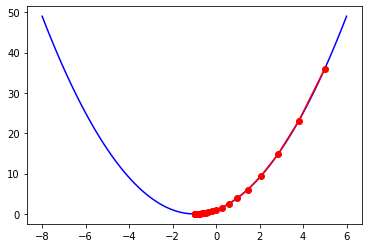

In [82]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'b')
plt.plot(history, y_history, 'r', marker='o')
plt.show()